In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from statsmodels.sandbox.stats.multicomp import multipletests


%matplotlib inline



In [3]:
data = pd.read_csv('hw6t4v1.txt', header = None, sep='\s+')
data.head()


,0,1
0,846.1,770.5
1,835.7,1088.5
2,856.4,1099.2
3,937.9,800.1
4,848.5,902.3


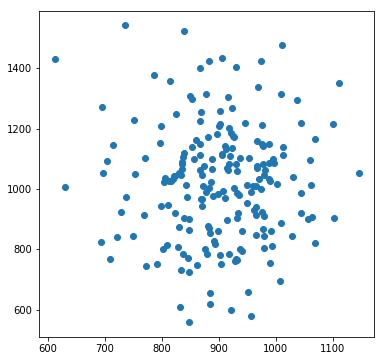

In [4]:
x1 = data.values[:,0]
x2 = data.values[:,1]
plt.figure(figsize=(6,6))
plt.scatter(x1, x2)
plt.show()


In [5]:
def mult(x1, x2, alpha = 0.01, method='fdr_bh'):
    p_val = np.zeros(4)
    observed = np.histogram2d(x1, x2, bins=[len(np.unique(x1)), len(np.unique(x2))])[0]
    observed += np.ones(observed.shape)
    depend = sps.chi2_contingency(observed)[1]
    p_val[1] = sps.shapiro(x1)[1]
    p_val[2] = sps.shapiro(x2)[1]
    if (depend < alpha / 4):
        p_val[0] = 1 - depend
        p_val[3] = sps.wilcoxon(x1, x2)[1]
        return multipletests(p_val, alpha=alpha, method=method)
    else:
        p_val[0] = depend
        p_val[3] = sps.ranksums(x1, x2)[1]
        return multipletests(p_val, alpha=alpha, method=method)
        
    

In [24]:
mult(x1, x2)




(array([False, False, False,  True], dtype=bool),
 array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.11128718e-52]),
 0.002509430066318874,
 0.0025)

In [12]:
def mult_upgrade(x1, x2, alpha = 0.01, method='fdr_bh'):
    p_val = np.zeros((4,4))
    observed = np.histogram2d(x1, x2, bins=[len(np.unique(x1)), len(np.unique(x2))])[0]
    observed += np.ones(observed.shape)
    p_val[0][0] = sps.chi2_contingency(observed)[1]
    p_val[0][1] = p_val[0][0]
    p_val[0][2] = 1 - p_val[0][0]
    p_val[0][3] = 1 - p_val[0][0]
    
    p_val[1][0] = sps.shapiro(x1)[1]
    p_val[1][1] = 1 - p_val[1][0] 
    p_val[1][2] = p_val[1][0]
    p_val[1][3] = 1 - p_val[1][0] 
    
    
    p_val[2][0] = sps.shapiro(x2)[1]
    p_val[2][1] = 1 - p_val[2][0] 
    p_val[2][2] = p_val[2][0]
    p_val[2][3] = 1 - p_val[2][0] 
    
    p_val[3][2] = sps.ttest_rel(x1,x2)[1]
    p_val[3][3] = sps.wilcoxon(x1, x2)[1]
    
    p_val[3][0] = sps.ttest_ind(x1,x2)[1]
    p_val[3][1] = sps.ranksums(x1, x2)[1]
    
    for i in range(4):
        print("%d : " % i)
        print(multipletests(p_val[i], alpha=alpha, method=method))
        
    

In [13]:
mult_upgrade(x1,x2)



0 : 
(array([False, False,  True,  True], dtype=bool), array([ 1.,  1.,  0.,  0.]), 0.002509430066318874, 0.0025)
1 : 
(array([False, False, False, False], dtype=bool), array([ 0.61683702,  0.69158149,  0.61683702,  0.69158149]), 0.002509430066318874, 0.0025)
2 : 
(array([False, False, False, False], dtype=bool), array([ 0.58514819,  0.58514819,  0.58514819,  0.58514819]), 0.002509430066318874, 0.0025)
3 : 
(array([ True,  True,  True,  True], dtype=bool), array([  4.05653531e-14,   2.83121285e-13,   1.63712576e-13,
         1.98544038e-12]), 0.002509430066318874, 0.0025)


Процедура с уровнем контроля FDR 0.01 не отвергает, что непарные нормальные выборки несмещены.